# METIS LM imaging mode

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import scopesim as sim
from scopesim.source.source_templates import star, star_field, empty_sky

sim.rc.__currsys__["!SIM.file.local_packages_path"] = r"F:/Work/irdb"

# Make a gird of 100 stars between 0 and 20 mag

In [33]:
src = star_field(100, 0, 20, 10, use_grid=True)

# Make the METIS optical train and show the effects included

In [34]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=["img_lm"])
metis = sim.OpticalTrain(cmd)
metis["detector_linearity"].include = False
metis.effects

element,name,class,included
str27,str32,str22,str9
armazones,armazones_atmo_skycalc_ter_curve,SkycalcTERCurve,True
armazones,armazones_atmo_dispersion,AtmosphericDispersion,False
armazones,armazones_atmo_default_ter_curve,AtmosphericTERCurve,False
ELT,eso_combined_reflection,SurfaceList,True
ELT,scope_vibration,Vibration,False
ELT,scope_surface_list,SurfaceList,False
METIS,metis_cfo_surfaces,SurfaceList,True
METIS,slit_wheel,SlitWheel,!OBS.slit
METIS,cold_stop,PupilTransmission,True


# Change the filter

In [35]:
metis["filter_wheel"].filters

{'open': FilterCurve: "open",
 'Lp': FilterCurve: "Lp",
 'short-L': FilterCurve: "short-L",
 'L_spec': FilterCurve: "L_spec",
 'Mp': FilterCurve: "Mp",
 'M_spec': FilterCurve: "M_spec",
 'Br_alpha': FilterCurve: "Br_alpha",
 'Br_alpha_ref': FilterCurve: "Br_alpha_ref",
 'PAH_3.3': FilterCurve: "PAH_3.3",
 'PAH_3.3_ref': FilterCurve: "PAH_3.3_ref",
 'CO_1-0_ice': FilterCurve: "CO_1-0_ice",
 'CO_ref': FilterCurve: "CO_ref",
 'H2O-ice': FilterCurve: "H2O-ice",
 'IB_4.05': FilterCurve: "IB_4.05",
 'HCI_L_short': FilterCurve: "HCI_L_short",
 'HCI_L_long': FilterCurve: "HCI_L_long",
 'HCI_M': FilterCurve: "HCI_M"}

In [36]:
metis["filter_wheel"].change_filter("Mp")
metis["filter_wheel"].current_filter

FilterCurve: "Mp"

# Observe the grid of stars

In [37]:
metis.observe(src)
img = metis.image_planes[0].data

hdus = metis.readout()
img = hdus[0][1].data

c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.
c:\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  import sys


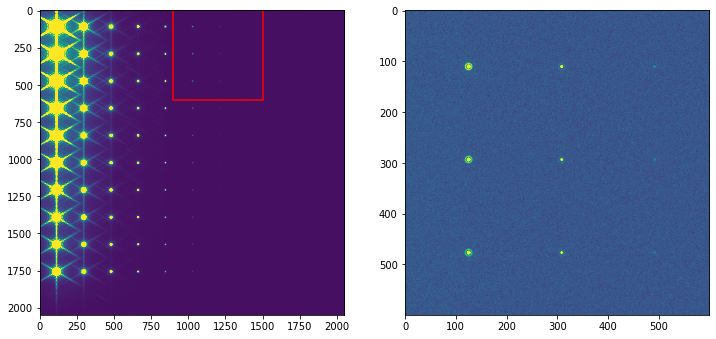

In [38]:
x = 900
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img, norm=LogNorm(), vmax=1.1*np.median(img))
plt.plot([x, x, x+600, x+600], [0, 600, 600, 0], "r")
plt.subplot(122)
plt.imshow(img[0:600, x:x+600], norm=LogNorm(), vmax=1.01*np.median(img))
plt.show()

# (Right) Stars start at Lp=10 mag